In [1]:
import warnings; warnings.simplefilter('ignore')
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as web 
from pandas.tools.plotting import autocorrelation_plot
#plot parameters
%matplotlib inline
sns.set_style("ticks")

In [2]:
end = datetime.date.today()
start=end.replace(end.year - 6) # 6 years from now
SPX = web.DataReader(['GOOG',"GS","AAPL","SD", "NFLX", "IBM", "BA","AABA"], "yahoo",start, end) # fetching data from yahoo finacnce for many stocks

In [3]:
list(SPX) #columns for each stocks

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [4]:
SPX['Adj Close'][:].head()

,AABA,AAPL,BA,GOOG,GS,IBM,NFLX,SD
Date,,,,,,,,
2012-02-07,15.830000,45.524502,64.568153,301.424530,106.677696,163.532974,18.268572,NaN
2012-02-08,15.780000,46.286762,65.172714,302.954559,106.834061,163.830124,17.714285,NaN
2012-02-09,16.000000,47.887978,65.552734,303.754364,106.585716,163.982941,17.834286,NaN
2012-02-10,16.139999,47.912247,64.732246,300.997314,104.966888,163.380112,17.704287,NaN
2012-02-13,16.120001,48.803650,64.645889,304.121979,105.344009,163.549957,16.900000,NaN


In [5]:
SPX['Volume'][:].head()

,AABA,AAPL,BA,GOOG,GS,IBM,NFLX,SD
Date,,,,,,,,
2012-02-07,13504500.0,79055900.0,4438700.0,4211200.0,5727300.0,3433000.0,81435200.0,NaN
2012-02-08,13439400.0,101972500.0,5350000.0,3696500.0,4958200.0,3803800.0,51012500.0,NaN
2012-02-09,22553000.0,221053700.0,4491100.0,4558800.0,4769800.0,3876400.0,40514600.0,NaN
2012-02-10,27790100.0,157825500.0,3361700.0,4680500.0,5849400.0,3391100.0,33901000.0,NaN
2012-02-13,10067300.0,129304000.0,3456500.0,3656100.0,3990000.0,2458800.0,52550400.0,NaN


In [6]:
SPX['Adj Close']['SD'].unique()[:10] # check SD stock has all nan values

array([      nan, 19.5     , 21.1     , 21.52    , 21.27    , 21.57    ,
       21.219999, 21.950001, 21.85    , 22.610001])

# Data Exploration.

### Correlation between stocks
Altaba Inc., Apple, Boing inc, Google, Netflix, and Goldman Sachs Group have strong correlation. While IBM and SandRidge Energy have weak anti-correlation with the other stocks as show the figure below. 

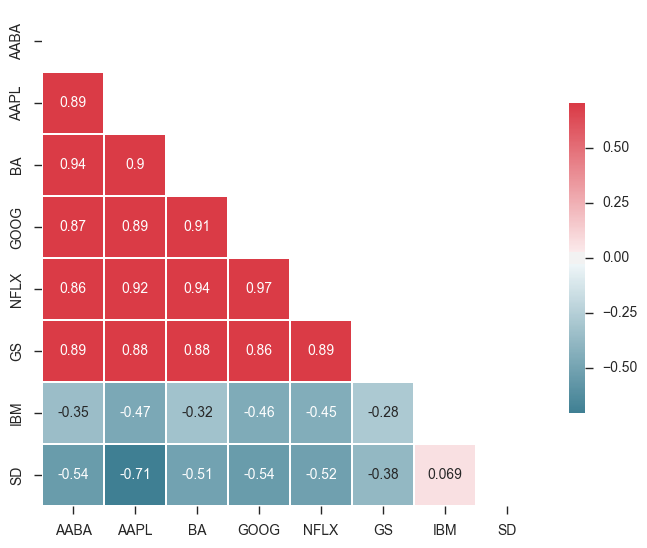

In [7]:
corr = SPX['Adj Close'][["AABA","AAPL","BA",'GOOG',"NFLX","GS","IBM",'SD']].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8));
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);

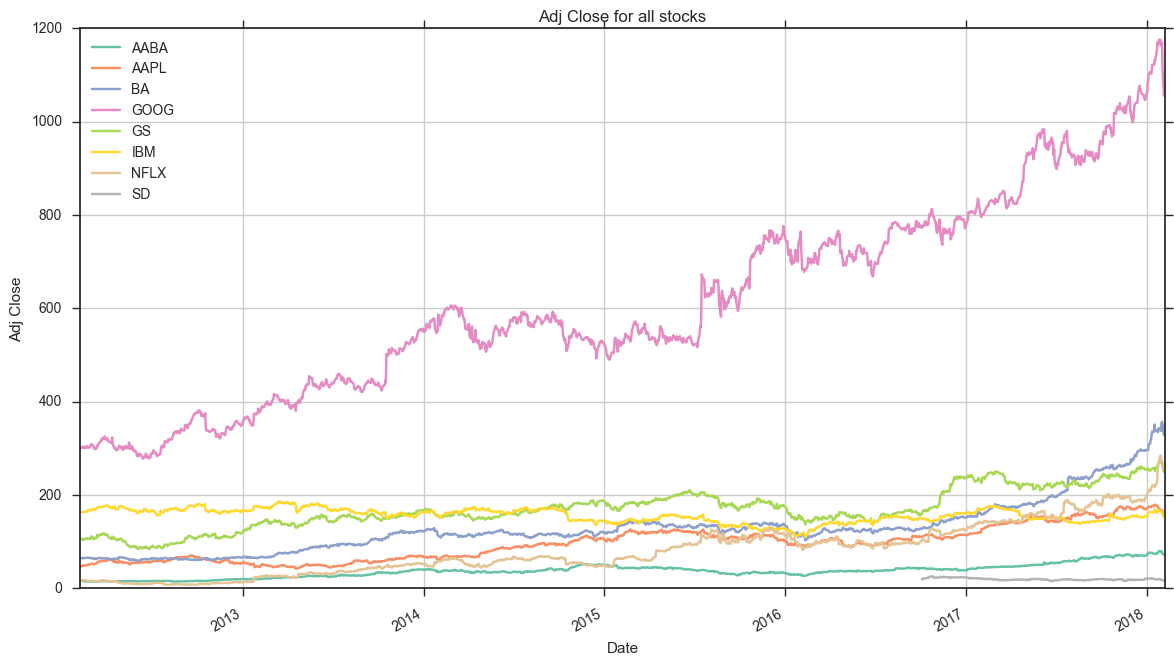

In [8]:
hls=sns.color_palette("Set2", 10)
for i, col in enumerate(SPX['Adj Close'].columns):
    SPX['Adj Close'][col].plot(title='Adj Close for all stocks',figsize=(14, 8),color=hls[i],
                          label=col,grid = True);
    plt.legend(loc='best')
plt.ylabel("Adj Close");

In [9]:
stock_return = SPX['Adj Close'][:].apply(lambda x: x / x[0])
stock_return.head()

,AABA,AAPL,BA,GOOG,GS,IBM,NFLX,SD
Date,,,,,,,,
2012-02-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2012-02-08,0.996841,1.016744,1.009363,1.005076,1.001466,1.001817,0.969659,NaN
2012-02-09,1.010739,1.051917,1.015249,1.007729,0.999138,1.002752,0.976228,NaN
2012-02-10,1.019583,1.052450,1.002541,0.998583,0.983963,0.999065,0.969112,NaN
2012-02-13,1.018320,1.072030,1.001204,1.008949,0.987498,1.000104,0.925086,NaN


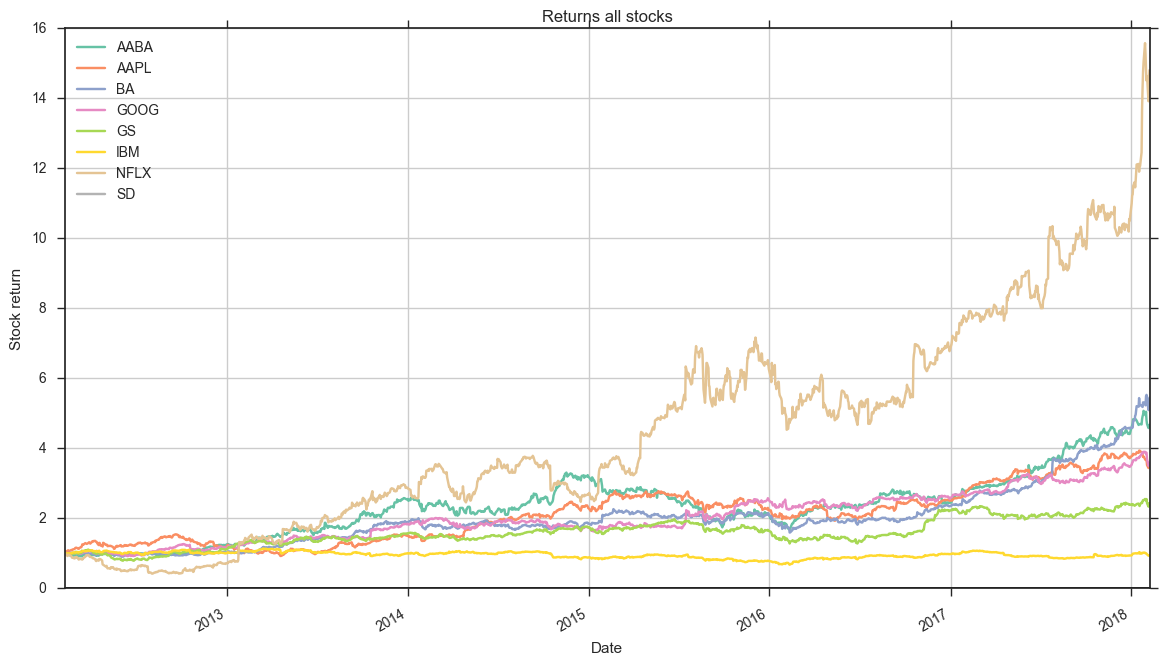

In [10]:
#stock_return.plot(title='stocks return',figsize=(10, 5)).axhline(y = 1, color = "black", lw = 2);
for i, col in enumerate(stock_return.columns):
    stock_return[col].plot(title='Returns all stocks',figsize=(14, 8),color=hls[i],
                          label=col,grid = True);
    plt.legend(loc='best')
plt.axhline(y = 0, color = "black", lw = 2);
plt.ylabel("Stock return");

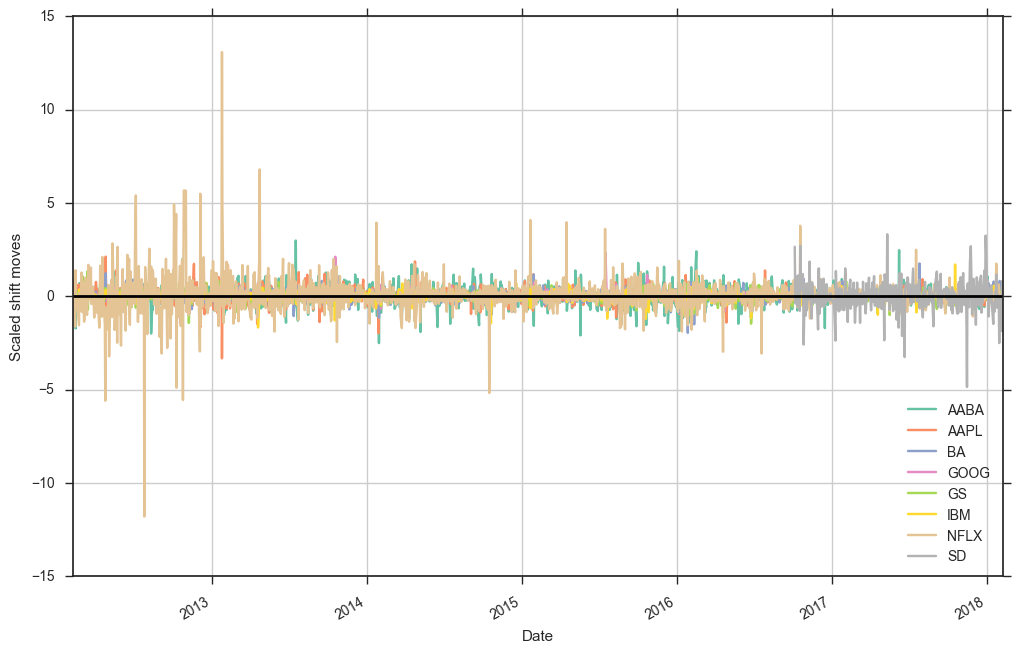

In [11]:
stock_return = SPX['Adj Close'][:].apply(lambda x: (np.log(x) - np.log(x.shift(1)))*100.0/np.log(x.shift(1))) # scaled shift moves dates back by 1.
for i, col in enumerate(stock_return.columns):
    stock_return[col].plot(grid = True, figsize=(12, 8),color=hls[i],
                          label=col)
    
    plt.legend(loc=4)
plt.axhline(y = 0, color = 'black', lw = 2);
plt.ylabel("Scaled shift moves");

### Daily pececntage change 

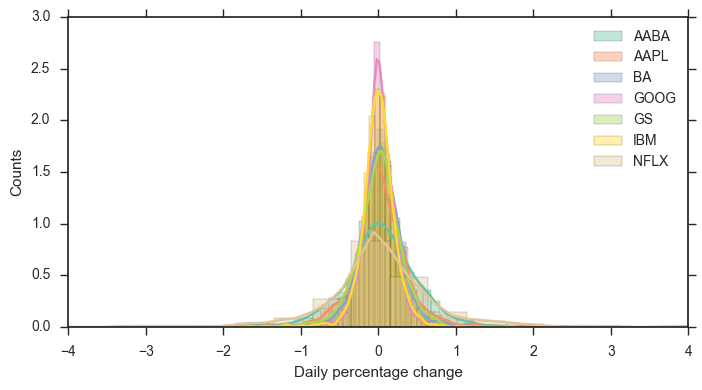

In [12]:
fig, ax = plt.subplots(figsize=(8,4)) 
for i, col in enumerate(stock_return.columns[:7]):
    
    sns.distplot(stock_return[col].dropna(),kde=True,label=col,color=hls[i],
                fit_kws={"color": hls[i]}, ax=ax)
plt.legend();
plt.xlabel("Daily percentage change");plt.ylabel("Counts");
plt.xlim([-4,4]);

### Simple vs Exponential Moving Average
Simple Moving Average (SMA) and the Exponential Moving Average (EMA) are the most common smoothing techniques in stock market analysis. So, what is their difference? SMA as its name it averages out the data with input time window. However, EMA gives weight to each time in the input time window with the recent price has more important than the older price. Think the stochastic process but the current price is much depending on the immediate price than its history (an infinite state $\it{Markovian}$ process). For short time window the two smoothing techniques are indistinguishable as shown the plots below.

#### Simple Moving Average

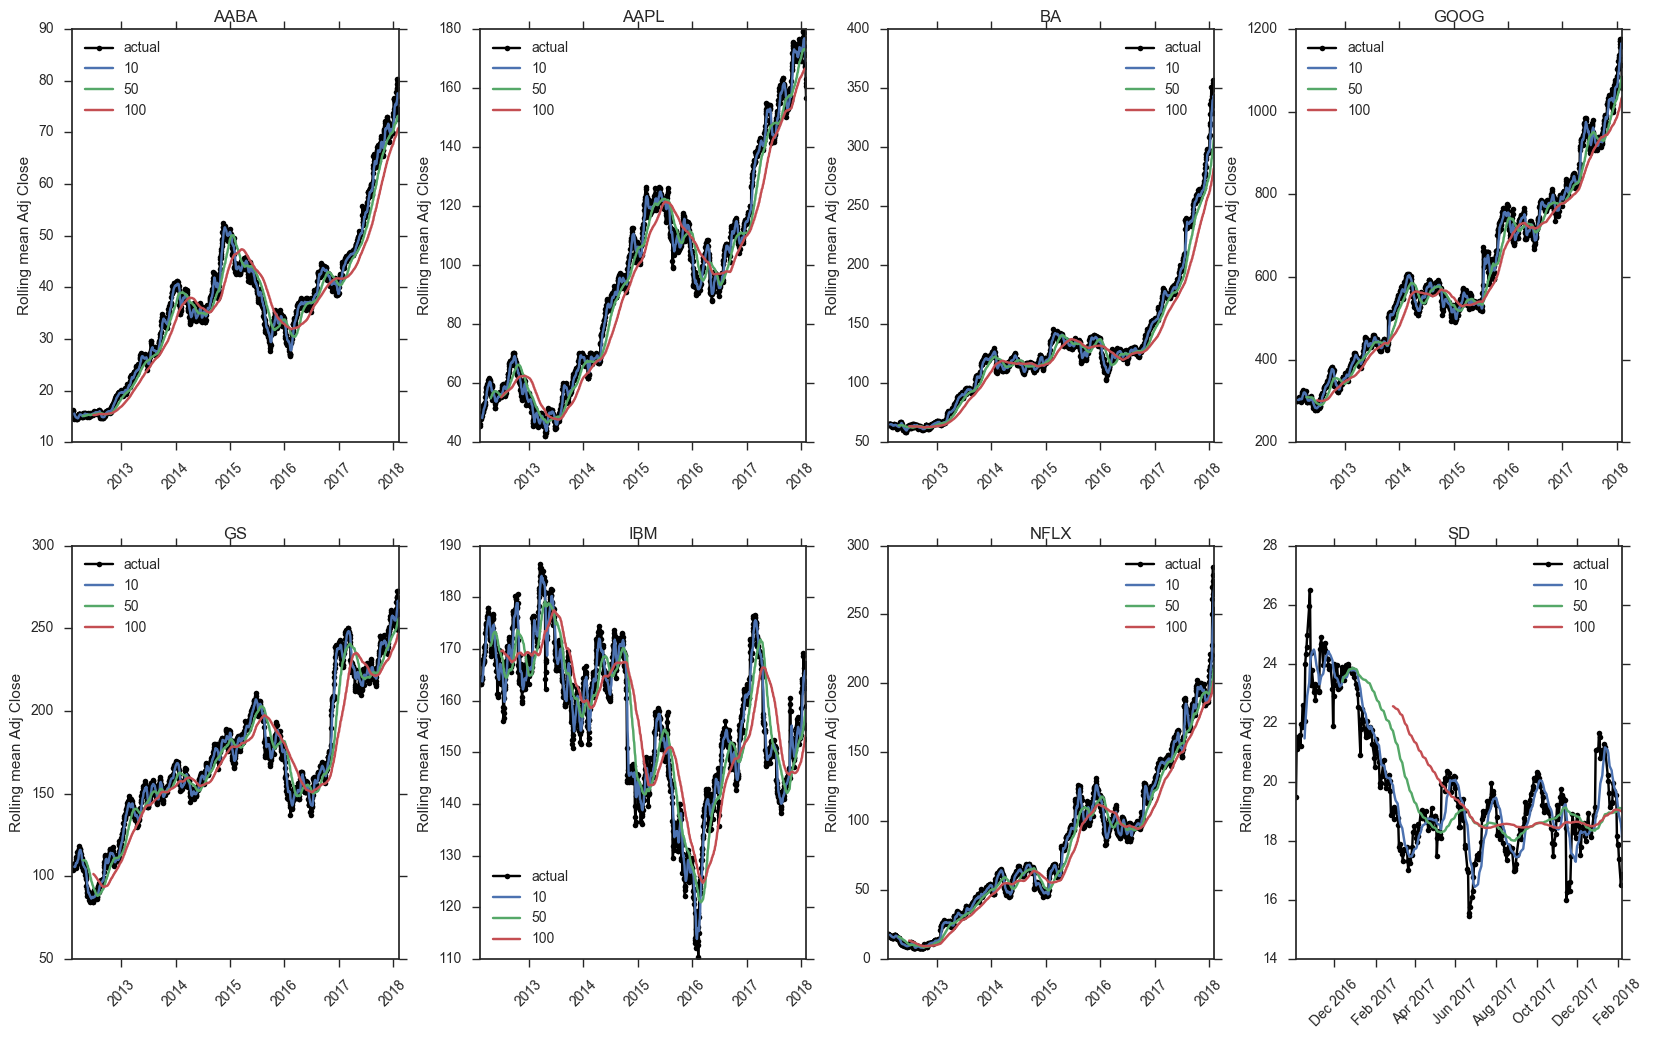

In [13]:
fig, axs = plt.subplots(2,4, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.25)

axs = axs.ravel()

roll_day = [10,50,100]
for j, col in enumerate(SPX['Adj Close'].columns):
    C=SPX['Adj Close'][col]
    axs[j].plot(C.index, C.values,label='actual',marker='o',markersize=4, color='black')
    for i, ma in enumerate(roll_day):
        column_name = "MA for %s days" %(str(ma))
        A=pd.rolling_mean(SPX['Adj Close'][col],ma)
        axs[j].plot(A.index, A.values,label=ma)
        axs[j].legend(loc='best');
        axs[j].set_title(col)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45)
        axs[j].set_ylabel('Rolling mean Adj Close')
        #axs[j].set_xticks(rotation=45)

#### Exponential Moving Average
Since EMAs place a higher weighting on recent data than on older data, they are more reactive to the latest price changes than SMAs are, which makes the results from EMAs more timely and explains why the EMA is the preferred average among many traders. As you can see from the chart below, traders with a short-term perspective may not care about which average is used, since the difference between the two averages is usually a matter of mere cents. On the other hand, traders with a longer-term perspective should give more consideration to the average they use because the values can vary by a few dollars, which is enough of a price difference to ultimately prove influential on realized returns - especially when you are trading a large quantity of stock.

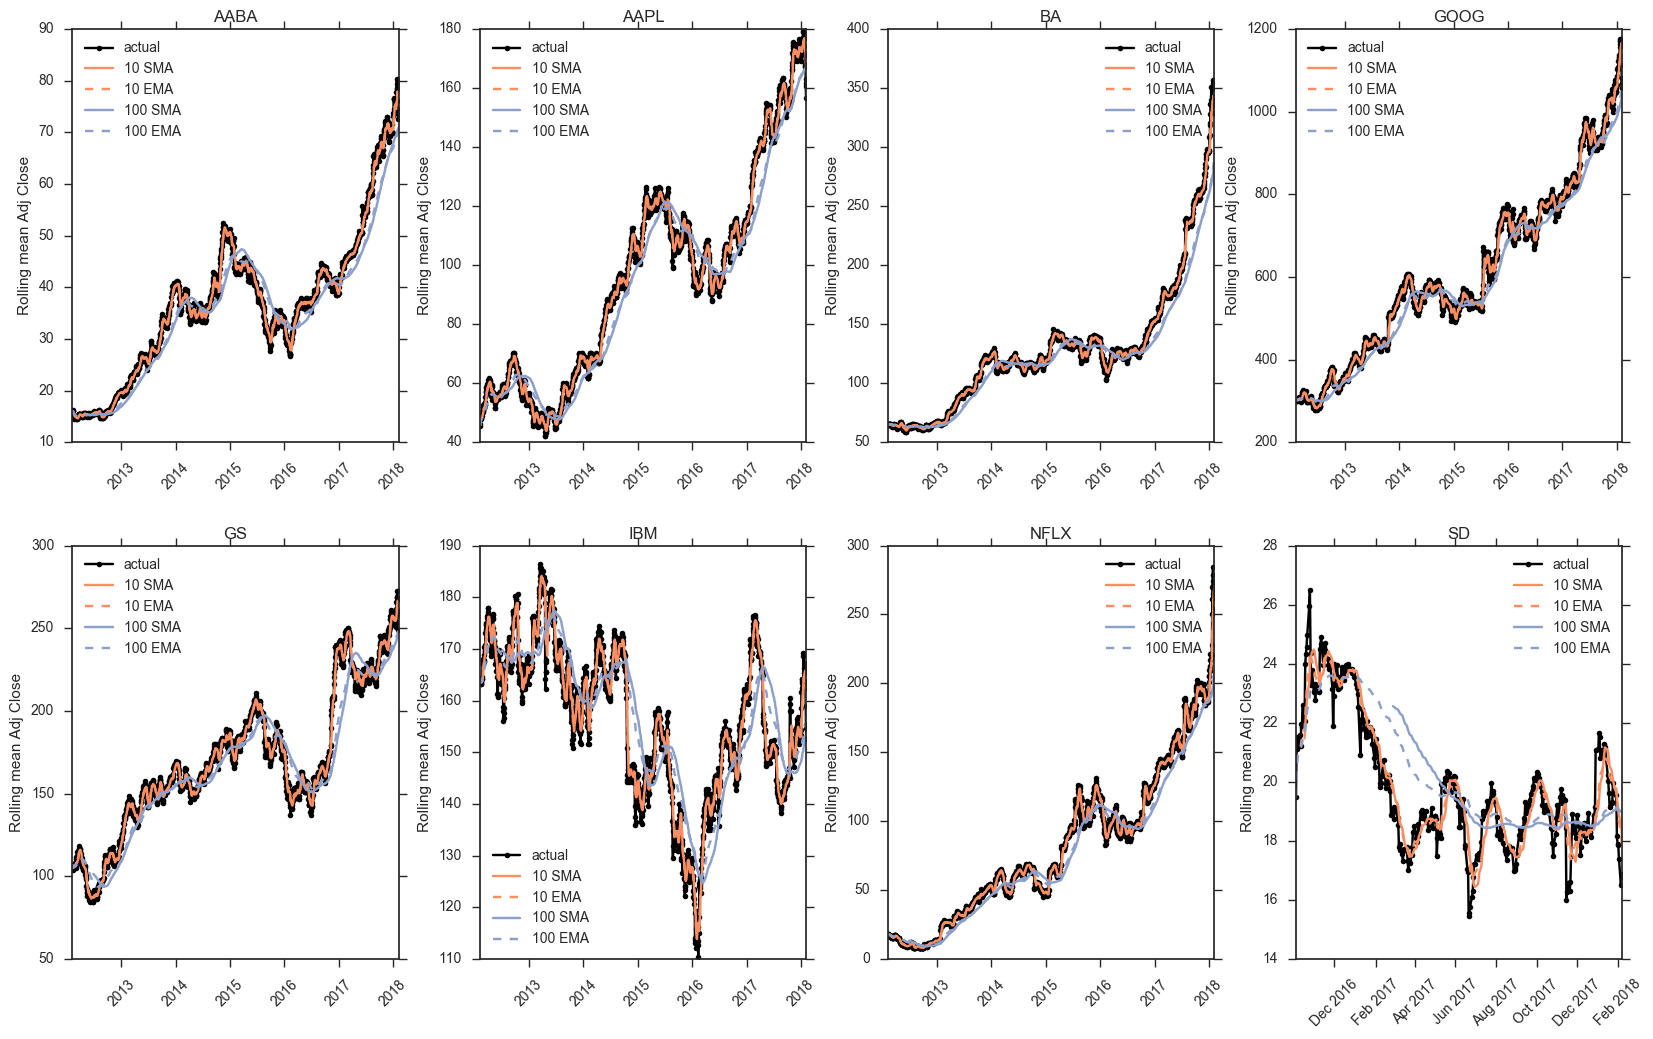

In [14]:
fig, axs = plt.subplots(2,4, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.25)

axs = axs.ravel()

roll_day = [10,100]
for j, col in enumerate(SPX['Adj Close'].columns):
    k=1
    C=SPX['Adj Close'][col]
    axs[j].plot(C.index, C.values,label='actual',marker='o',markersize=4, color='black')
    for i, ma in enumerate(roll_day):
        column_name = "MA for %s days" %(str(ma))
        A=pd.rolling_mean(SPX['Adj Close'][col],ma)
        B=SPX['Adj Close'][col].ewm(span=ma).mean()
        axs[j].plot(A.index, A.values,label=str(ma)+' SMA',color=hls[k])
        axs[j].plot(B.index, B.values,label=str(ma)+' EMA',linestyle='--',color=hls[k])
        axs[j].legend(loc='best');
        axs[j].set_title(col)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45)
        axs[j].set_ylabel('Rolling mean Adj Close')
        k=k+1
        #axs[j].set_xticks(rotation=45)

From the plots, we can see that for short time window (10 days) the moving average of SMA and EMA are almost identical to the original data. However, the for longer time window (100 days) the SMA and EMA are different. In 2016, it's interesting to see that a common patter that most of the stocks price was falling and recover back (except Gooogle (GOOG)), news about the failling of stock markets during that time, https://www.reuters.com/article/us-usa-markets/whats-behind-the-global-stock-market-selloff-idUSKCN0VL0XO.

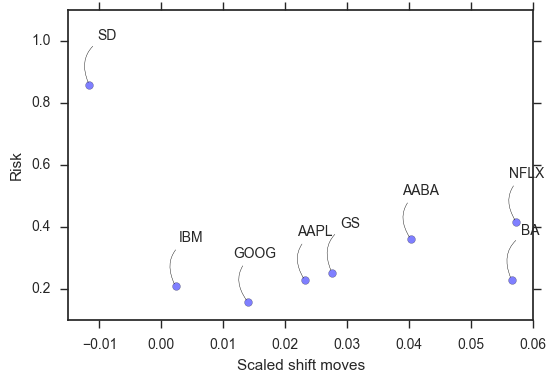

In [15]:
# Cleaning data frame by droping rows having null values
tech_rets=stock_return.dropna()
#tech_rets=SPX['Adj Close'][:].dropna().pct_change(1)
# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*10

plt.scatter(tech_rets.mean(), tech_rets.std(),alpha = 0.5,s =area)
plt.ylim([0.1,1.10])
plt.xlim([-0.015,0.06])
plt.xlabel('Scaled shift moves')
plt.ylabel('Risk')
for label, x, y in zip(tech_rets.columns, tech_rets.mean(), tech_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

NFLX and BA have a better return, however, NFLX has a higher risk. We always want a have high return with lower risk. 

# Modeling stock market as a random walk process using Monte Carlo method
It is debatable though to think about stock markets evolve as purely a random walk process. Nevertheless, for this practice, we think stock markets evolve a random walk process. A simple random walk in one dimension has a solution of the form: 
 
$S_{t}=S_{0}\exp \left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)$, 

where $\mu$, $\sigma$, $S_0$ and $W_{t}$ are mean, standard deviation, initial stock price and step {forward (+1) or backward (-1)} of the market.

Using the mean and standard deviation we calculated above, we will simulate the stock market using a Monte Carlo simulation and compute the statistics of the simulation. 

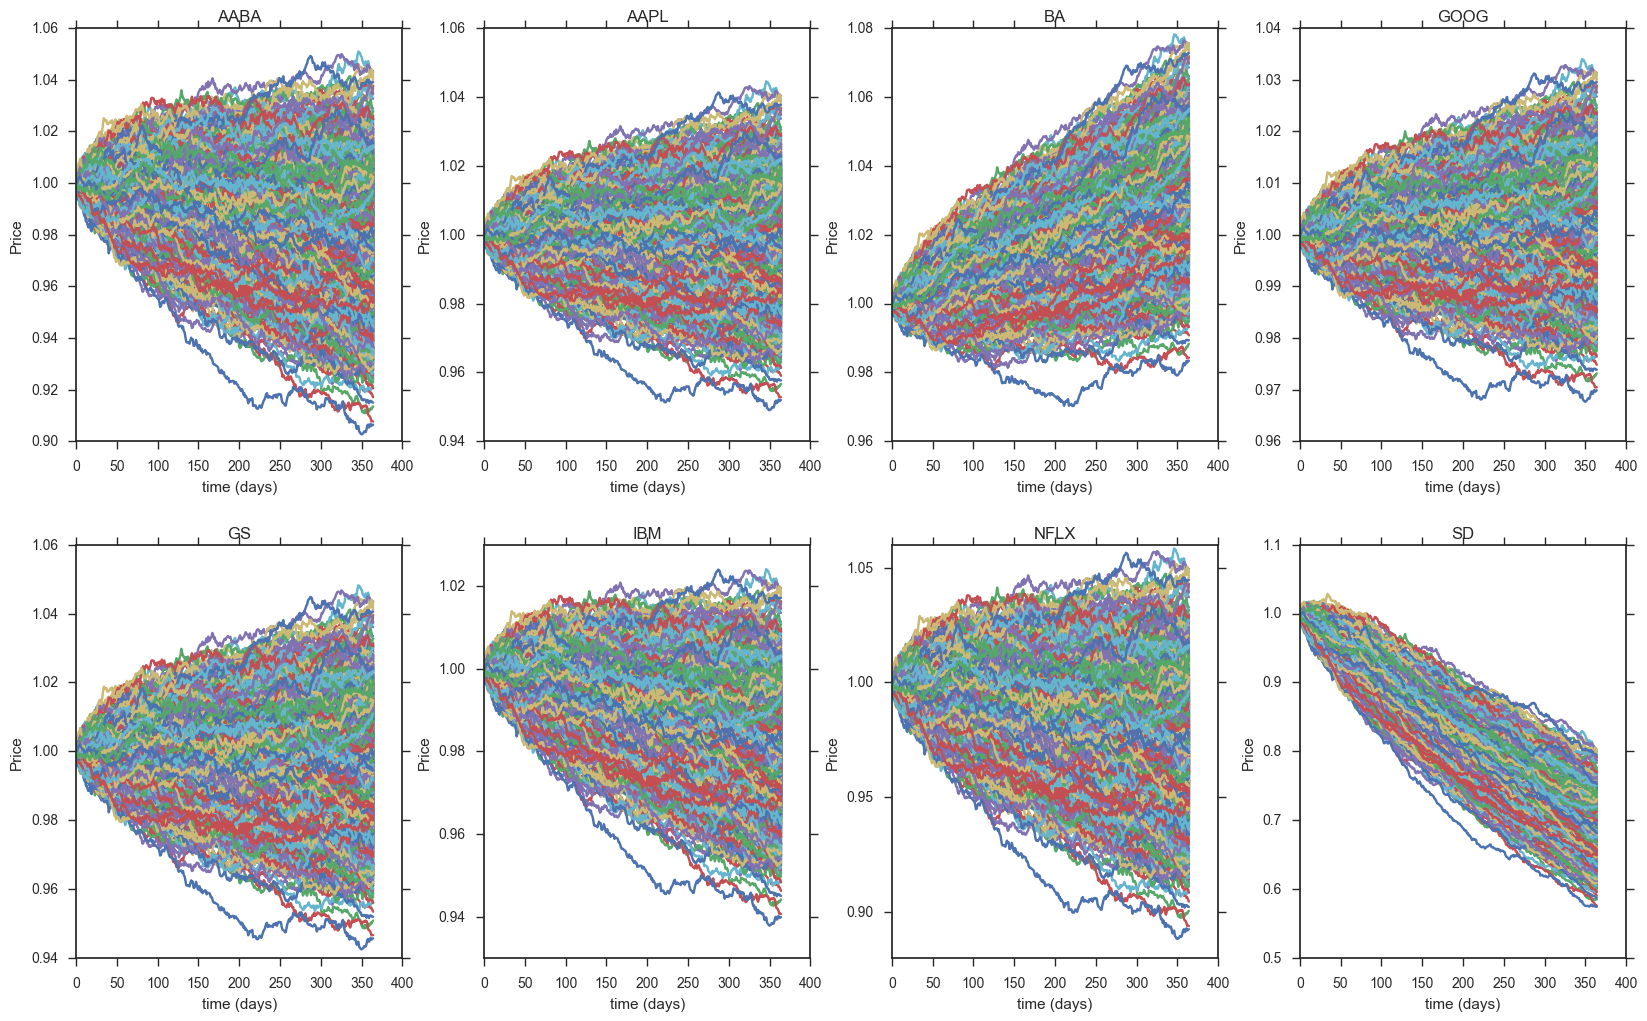

In [16]:
n = 365 # day
dt= 1.0/n # time step
S_0=1.0 # scalled initial price
T=5000 # number of simulation

fig, axs = plt.subplots(2,4, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.25)
axs = axs.ravel()

Simulation=dict()

for k, stock in enumerate(tech_rets.columns):
    mu=tech_rets[stock].mean()
    sigma=tech_rets[stock].std()
    x=pd.DataFrame(index=range(n))
    np.random.seed(123)
    for i in range(T):
        step=np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*np.random.normal(0,dt,(1,n)))
        temp=pd.DataFrame(S_0*step.cumprod())
        x.loc[:,'sim'+str(i)]=temp
    #x.columns=np.arange(0.8,2,0.2)
    axs[k].plot(x);
    #plt.legend(x.columns)
    axs[k].set_xlabel('time (days)');
    axs[k].set_ylabel('Price');
    axs[k].set_title(stock);
    Simulation[stock]=x

The individual trajectory of MC simulation is noisy. However, interesting dynamics emerges looking at the distribution of the simulation. 
For example, BA stock has a better return. Of course, if you see from the risk analysis BA has a lower risk with higher return. 

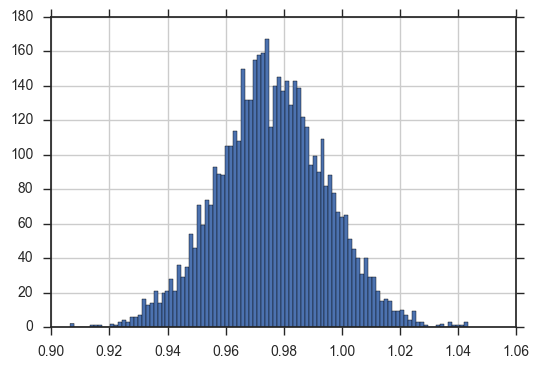

In [17]:
Simulation['AABA'].iloc[-1,:].hist(bins=100)

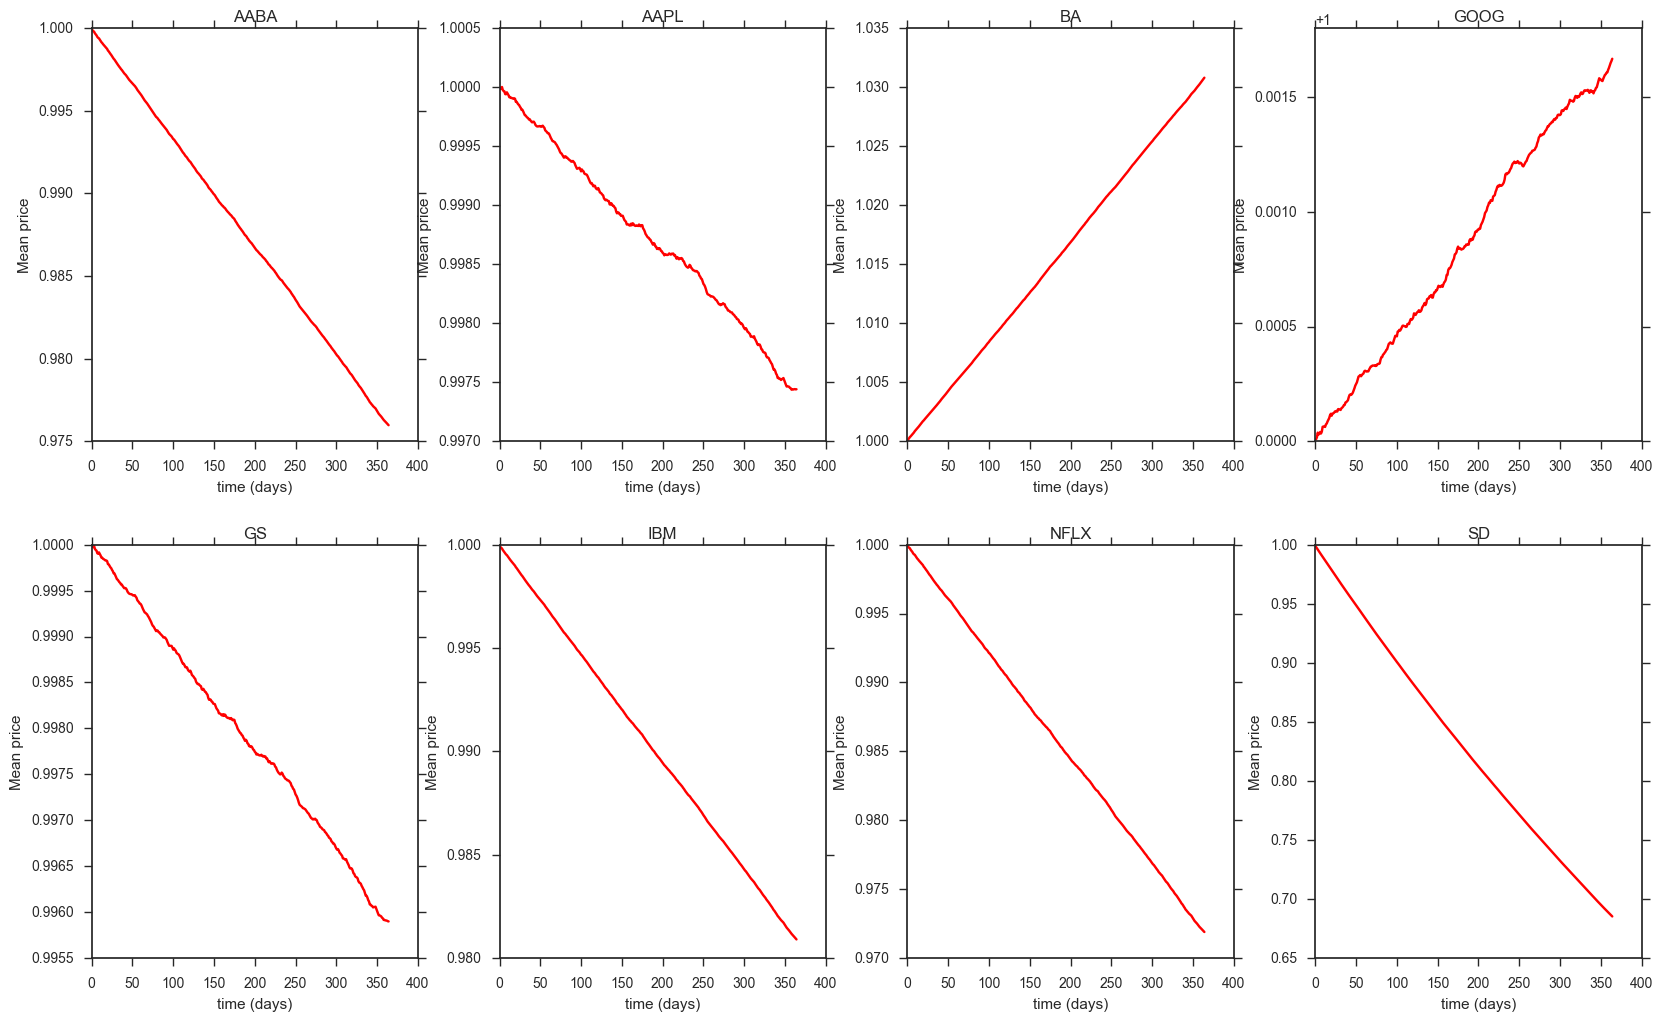

In [18]:
fig, axs = plt.subplots(2,4, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.25)
axs = axs.ravel()

for i, stock in enumerate(tech_rets.columns):
    axs[i].plot(Simulation[stock].index, Simulation[stock].mean(axis=1), color='red');
    axs[i].set_xlabel('time (days)');
    axs[i].set_ylabel('Mean price');
    axs[i].set_title(stock);
    #axs[i].set_ylim(650, 1080);

The mean value of price at the end of each simulation. BA and Google have always positive return at any time, while the rest can have a negative return dependening on the variance. Remember, this only the mean value and we did not include the variance.

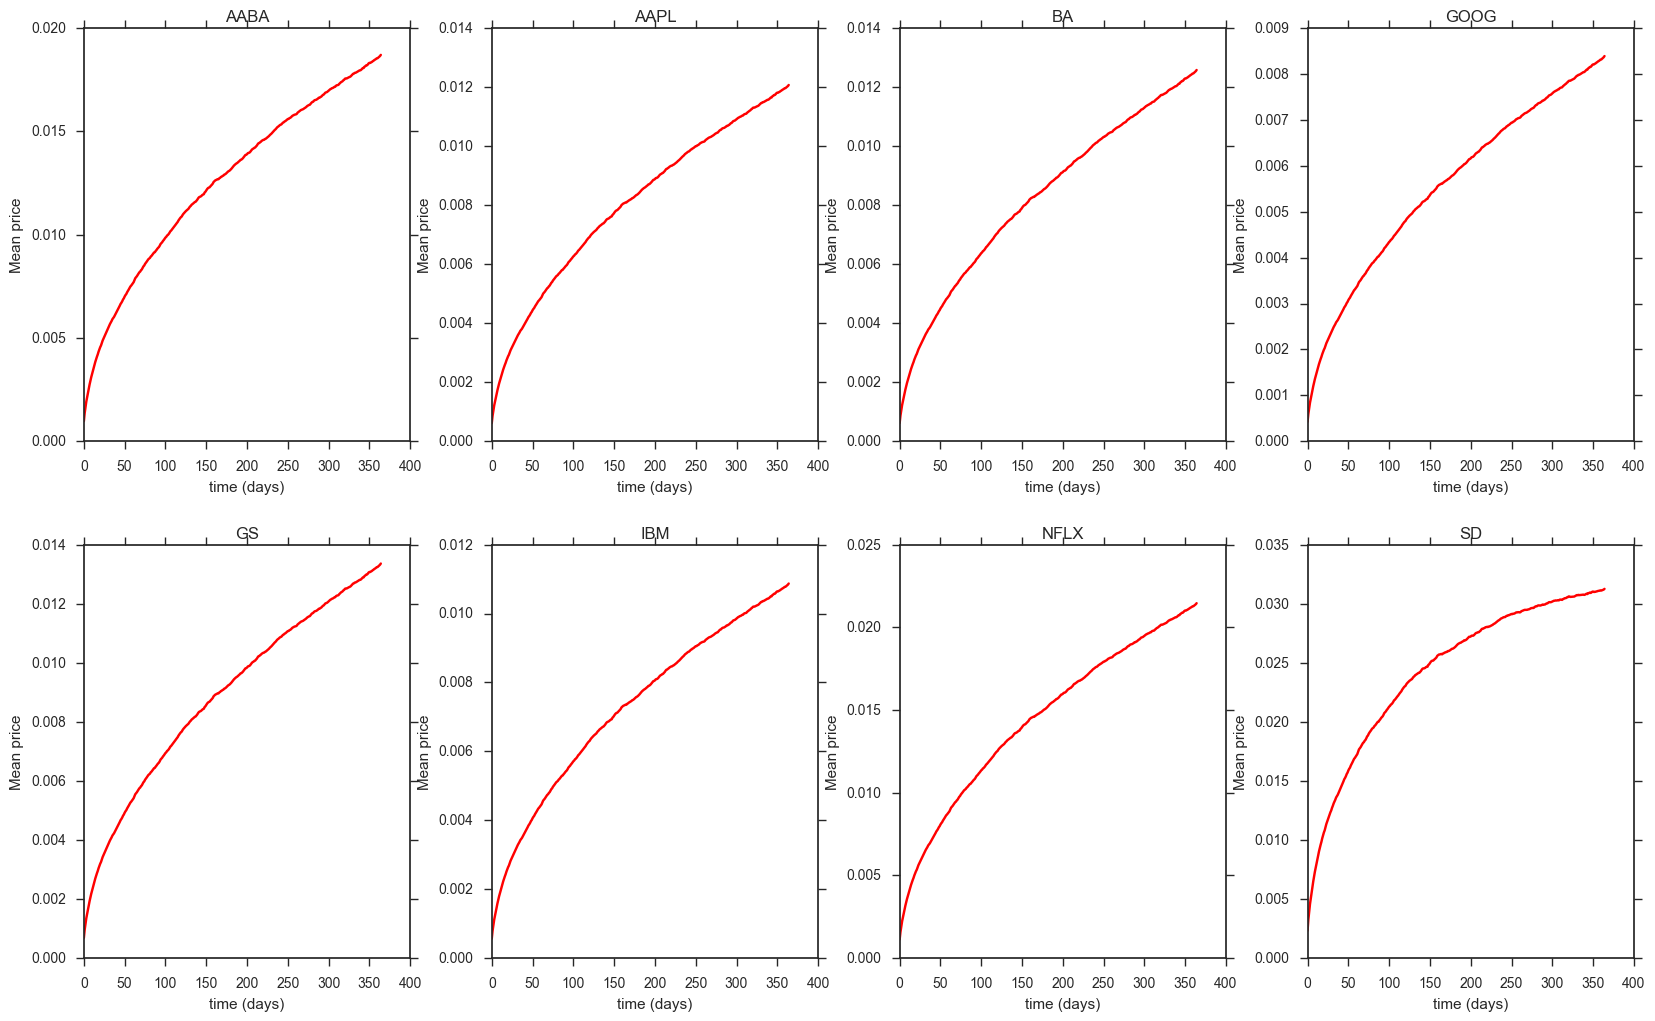

In [19]:
fig, axs = plt.subplots(2,4, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.25)
axs = axs.ravel()

for i, stock in enumerate(tech_rets.columns):
    axs[i].plot(Simulation[stock].index, Simulation[stock].std(axis=1), color='red');
    axs[i].set_xlabel('time (days)');
    axs[i].set_ylabel('Mean price');
    axs[i].set_title(stock);
    #axs[i].set_ylim(650, 1080);

The mean STD value of the simulation grows exponential with time for all stock. Well, it is not surprising that each trajectory of MC simulation tends to different as 
time goes by. 

### Modelling time series with ARIMA 

In the second part of this series excercise, I will use Autoregressive integrated moving average (ARIMA), a tool for time-series forecasting, for a better stock market prediction. An ARIMA model describes a univariate time series as a combination of autoregressive (AR) and moving average (MA) lags which capture the autocorrelation within the time series. The order of integration denotes how many times the series has been differenced to obtain a stationary series.

Running the example below, we can see that there is a positive correlation with the first 400-to-600 lags that is perhaps significant for the first 200 lags. A good starting point for the AR parameter of the model may be 200. We will start with this lag.

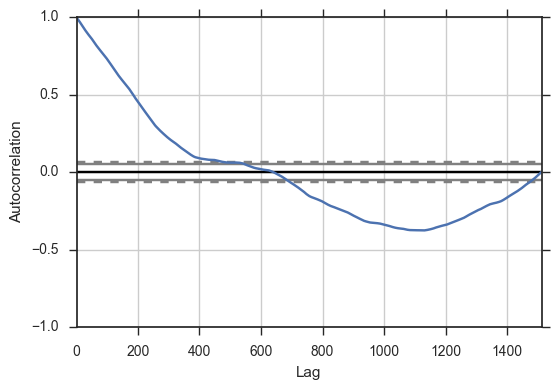

In [21]:
autocorrelation_plot(SPX['Adj Close']['AAPL'])